Hola **Adolfo**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [43]:
import pandas as pd 
from matplotlib import pyplot as plt # importar librerías

In [44]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';') # leer conjuntos de datos en los DataFrames
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_ord_products = pd.read_csv('/datasets/order_products.csv', sep=';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo importando las librerías y cargando tus datos en celdas diferentes.
</div>

In [45]:
print(df_orders.info())
display(df_orders.head())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [46]:
print(df_products.info())# mostrar información del DataFrame
display(df_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [47]:
print(df_aisles.info())
display(df_aisles.head())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [48]:
print(df_departments.info())# mostrar información del DataFrame
display(df_departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [49]:
print(df_ord_products.info(show_counts= True)) # mostrar información del DataFrame
display(df_ord_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


Al empezar a subir todos los archivos para leerlos con pandas como DataFrames, me percate que la separación no fue con ',' sino con ';' por lo que tuve que agregar el método sep= para especificar que la separación era diferente. Después de eso volvi a cargar los archivos y llamar info para ver su información general y ya me aparecieron todas las columnas de cada uno de ellos.

Por otro lado, ya visualizando info() en cada uno de los DataFrames se ve que hay columnas que contienen datos ausentes, y a simple vista podemos ver que el nombre de cada una de las columnas se encuentra en minúsculas y en 'snake_case'.

Adentrandonos un poco más, se nos dió al principio el contenido de cada una de las columnas por archivo, y se puede ver que se identificaron con tipo de datos incorrectos, y que se pudieran modificar para poder trabajar mejor con ellos.

También además de info() imprimi las primeras filas de cada uno de los Dataframe para poder darme una idea más clara de cada uno de ellos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Mostraste los datos completos de cada dataset y redactaste conclusiones adecuadas
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

La verificación para asegurarnos de que todas las columnas 'id' son números enteros se pudo lograr con el método info() en donde nos despliega tambien el tipo de datos de cada columna, siendo todas las 'id' clasificadas como int64 que son números enteros, sin embargo también hay columnas que se ve que se clasificaron como float y son enteros.

También visualice las primeras 5 filas de cada DataFrame para analizar un poco más su contenido.
Visualmente las columnas están bien escritas, todas estan homologadas escritas con minúsculas y en 'snake_case', pero en el dataframe de 'df_products' la descripción de los productos esta en mayúsculas y minúsculas, pudiendo complicar un poco si quisieramos trabajar con esa columna.

El siguiente paso sería seguir limpiando cada DataFrame y localizar datos que nos puedan entorpecer nuestro análisis como lo son los datos ausentes y los datos duplicados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [50]:
# Revisa si hay pedidos duplicados

print('duplicados lista orders:', df_orders.duplicated().sum())

print('pedidos duplicados:', df_orders['order_id'].duplicated().sum())

duplicados lista orders: 15
pedidos duplicados: 15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Al pasar la función duplicates tanto en el lista completa como en la columna de pedidos, coincide que hay 15 filas duplicadas que podemos eliminar. Es importante la columna order_id ya que debe contener valores unicos y si se repite es mejor eliminar esos duplicados

In [51]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
display(df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Ya habiamos detectado que la lista contiene 15 duplicados, y el visualizar todos los pedidos hechos el miercoles a las 2:00 am, son muchos para esa hora, pero con esa visualización no nos ayuda a ver los duplicados

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el filtro aplicado y la revisión de duplicados! Te recomiendo no usar `print()` para mostrar resultados de DataFrame ya que como puedes observar se muestran como strings, en su lugar puedes usar `display()` y esto mostrará los resultados en formato de tabla. Te pediría ese ajuste para el resto de casos donde usas print para los dataframes
</div>

<div class="alert alert-block alert-info">
<b>No conocia display(), ya estoy sustituyendo todos los print() por display() y si sale un resultado más ordenado y mejor formato de salida. Muchas gracias.</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Me alegro que te sirvió esa recomendación! Siempre hay que buscar la forma de dejar bien presentado nuestros proyectos
</div>

In [52]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates()

In [53]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())

0


In [54]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

En el primer análisis hecho, me percate que la lista contenía 15 duplicados en la lista 'orders', corroborandolo cuando también busque si había los Ids de las Ordenes duplicados y salio el mismo número de duplicados, pero se eliminaron de manera fácil con el método drop_duplicates()

### `products` data frame

In [55]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [56]:
# Revisa únicamente si hay ID de productos duplicados
print(df_products['product_id'].duplicated().sum())

0


In [57]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

df_products['product_name'] = df_products['product_name'].str.upper()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Al guardar sobre la misma columna la transformación dejas estandarizados la escritura y evitas problemas más adelante
</div>

In [58]:
# Revisa si hay nombres duplicados de productos no faltantes

print(df_products['product_name'].duplicated().sum())

1361


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En la lista de 'products' podemos ver que no hay filas duplicadas, al igual que en la columna de 'product_id' y es importante esta columna porque sus valores son únicos, por lo que no puede haber duplicados. En la columna de 'product_name' contiene el nombre del producto que aunuque en la presentación del proyecto no esta descrito como un valor único, este si debe de serlo ya que debe coincidir con su 'product_id', tenemos que seguir analizando más esta columna que aparecen duplicados ya que puede ser que la clasificación sea más generica en donde caben varios 'product_id' o existan ciertas categorias de algún producto.

### `departments` data frame

In [59]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [60]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(df_departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En esta lista de 'departments' observamos que no hay ni filas ni sus IDs duplicados

### `aisles` data frame

In [61]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [62]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df_aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al igual que la lista de 'departments' esta lista de 'aisles' tampoco tiene filas ni IDs duplicadas.

### `order_products` data frame

In [63]:
# Revisa si hay filas totalmente duplicadas
print(df_ord_products.duplicated().sum())

0


In [64]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_ord_products['order_id'].duplicated().sum())
display(df_ord_products.apply(pd.value_counts))

4094961


,order_id,product_id,add_to_cart_order,reordered
0.0,NaN,NaN,NaN,1861169.0
1.0,NaN,280.0,450046.0,2683838.0
2.0,NaN,11.0,428199.0,NaN
3.0,NaN,42.0,401907.0,NaN
4.0,13.0,49.0,372861.0,NaN
...,...,...,...,...
3421034.0,17.0,NaN,NaN,NaN
3421053.0,9.0,NaN,NaN,NaN
3421071.0,5.0,NaN,NaN,NaN
3421077.0,4.0,NaN,NaN,NaN


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Podemos ver que al parecer no hay dulplicados en esta lista, y anteriormente, ya habia pasado los duplicados de la columna 'order_id' pareciendo que tiene muchos valores duplicados y esta columna debe tener valores únicos, sin embargo, aqui aplicamos el método value_counts para toda la tabla, apareciendo que existen valores que se repiten varias veces y también hay muchos datos ausente en la tabla que podrían estar pasando engañosamente como duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [65]:
print(df_products['product_name'].isna().sum())# Encuentra los valores ausentes en la columna 'product_name'

1258


Describe brevemente cuáles son tus hallazgos.

En la columna 'product_name' encontramos 1258 valores ausentes

In [66]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
display(df_products[df_products['aisle_id'] == 100])

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Haciendo el filtro para ver todas las filas que tienen el ID del pasillo 100 son 1258 que es la misma cantidad de los valores ausentes, por lo que si hay una relación con el número de ID del pasillo 100.

In [67]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
display(df_products[df_products['department_id'] == 21])

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Al hacer el filtrado para ver todas las filas con id de departamento número 21, aparece la misma lista filtrada con el pasillo de identificación 100 y coincide con el número total de valores ausentes, por lo que si existe una relación entre los valores ausentes el id de pasillo 100 y el id de departamento 21.

In [68]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisles[df_aisles['aisle_id']== 100])
print()
print(df_departments[df_departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

podemos ver que el pasillo identificado con el 100  y el departamento con id 21 tienen la palabra en ingles 'missing' que es desaparecido o no se encuentra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto, utilizaste los datasets correctos y ahora es más el por qué se tiene datos ausentes de esos ID
</div>

In [69]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

print(df_products['product_name'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al ver o tratar de rastrear el significado de los valores ausentes, se tomo la decisión de cambiar esos datos ausentes por la palabra 'Unknown' de esa manera vamos a poder trabajar mejor con ese Dataframe.

### `orders` data frame

In [70]:
# Encuentra los valores ausentes
display(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [71]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
display(df_orders[df_orders['days_since_prior_order'].isna()])

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los valores ausentes estan localizados en la columna 'days_since_prior_order' y coincide con el primer pedidos del cliente, ya que no hay dias anteriores a dicha compra.

### `order_products` data frame

In [72]:
# Encuentra los valores ausentes
display(df_ord_products.isna().sum())
print()
display(df_ord_products[df_ord_products['add_to_cart_order'].isna()])

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [73]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_ord_products['add_to_cart_order'].min())
print(df_ord_products['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.

Los valores ausentes se encuentran localizados en la columna 'add_to_cart_order' que es el orden secuencial en que se añadieron cada producto en el carrito, viendo que los valores min y maximo son 1 y 64

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo buscando los valores máximos y mínimos!
</div>

In [74]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ids_order_nan = df_ord_products.loc[df_ord_products['add_to_cart_order'].isna(),'order_id'].reset_index(drop=True)
display(ids_order_nan)

0      2449164
1      1968313
2      2926893
3      1717990
4      1959075
        ...   
831    1800005
832    1633337
833     404157
834    1673227
835    1832957
Name: order_id, Length: 836, dtype: int64

In [75]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
conteo_nan = df_ord_products[df_ord_products['order_id'].isin(ids_order_nan)]
display(conteo_nan)

conteo = conteo_nan.groupby('order_id')['product_id'].count()
pedidos_mas_de_64 = (conteo > 64).all()

print('¿Todos los pedidos con valores ausentes tienen más de 64 productos?', pedidos_mas_de_64)
print()

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
df_filter_ord_id_null = df_ord_products[df_ord_products['order_id'].isin(ids_order_nan)]
display(df_filter_ord_id_null)
print()
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
conteo_producto_pedido = df_ord_products.groupby('order_id')['product_id'].count()
display(conteo_producto_pedido)
print('El valor mínimo del conteo es:', conteo_producto_pedido.min())

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


¿Todos los pedidos con valores ausentes tienen más de 64 productos? True



,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
4543519,2621907,32018,28.0,1
4544672,102236,34688,49.0,0
4544708,2256933,41544,21.0,0
4544771,180546,12741,46.0,1


order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

El valor mínimo del conteo es: 1


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Para revisar si los pedidos con valores ausentes tienen o no más de 64 pedidos deberías usar las order_id que que tienes en la variable `ids_order_nan` (Solo toma los valores de la columna order_id) y filtrar en el dataset original utilizando `isin()` y luego si agrupar por order_id y contar en product_id, ya que de la forma en que lo estás haciendo solo cuenta cuantos valores ausentes hay por órden pero puede que tengas órdenes que tiene valores ausentes y también valores que no lo son y lo que interesa es contar todos estos datos.
</div>

<div class="alert alert-block alert-info">
Realice lo indicado y si ya puedo concluir que todos los productos con datos ausentes en la columna 'add_to_cart_order' si tienen mas de 64 productos

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Ahora cómo puedes observar la forma en la que aplicas los filtros es súper importante ya que puede darte un resultado diferente y llevarte a conclusiones erroneas
</div>

Describe brevemente cuáles son tus hallazgos.

De lo que se analiza no podemos asumir que los valores ausentes sean para pedidos con mas de 64 productos, tenemos que seguir analizando.

In [76]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_ord_products['add_to_cart_order'] = df_ord_products['add_to_cart_order'].fillna('999').astype(int)
print(df_ord_products.info(show_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se rellenaron los datos ausentes de la columna 'add_to_cart_order' a 999 y se cambio el tipo de datos de float a entero

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


En este segundo paso se revisaron uno por uno cada Dataframe, se limpiaron, eliminando duplicados, revisando los datos ausentes y sustituyendolos por otro valor. Se usaron los metodos info() duplicated() isna() fillna() y realizando diferentes filtrados para comparar datos y así poder tomar decisiones de eliminación o sustitución de datos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [77]:
print(df_orders['order_hour_of_day'].min())
print(df_orders['order_hour_of_day'].max())

0
23


In [78]:
print(df_orders['order_dow'].min())
print(df_orders['order_dow'].max())

0
6


Escribe aquí tus conclusiones

Se verificó que las horas del día no se hubieran registrado incorrectamente, al igual que los días de la semana, asegurandonos así que los datos son correctos y se pueden trabajar con ellos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

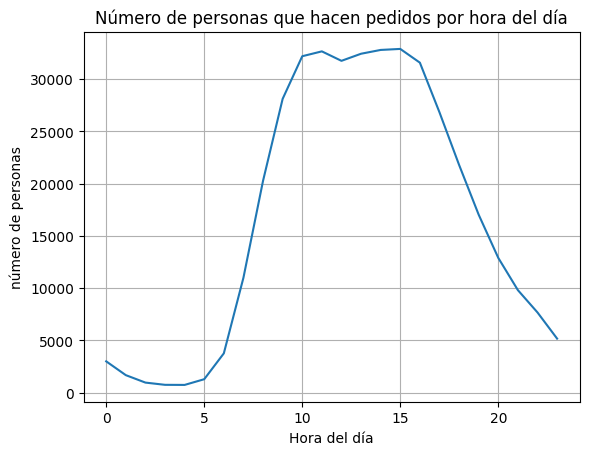

In [79]:
usuarios_por_hora = df_orders.groupby('order_hour_of_day')['user_id'].nunique()

usuarios_por_hora.plot(xlabel= 'Hora del día', ylabel= 'número de personas', title= 'Número de personas que hacen pedidos por hora del día', grid= True)
plt.show()


Escribe aquí tus conclusiones

Podemos apreciar que las personas suelen hacer más pedidos entre las 10 am a las 3 pm.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Al usar `nunique()` descartas usuarios que realicen más de una órden por día
</div>

<div class="alert alert-block alert-info">
    Trato de sacarlo de otra forma sin usar nunique()

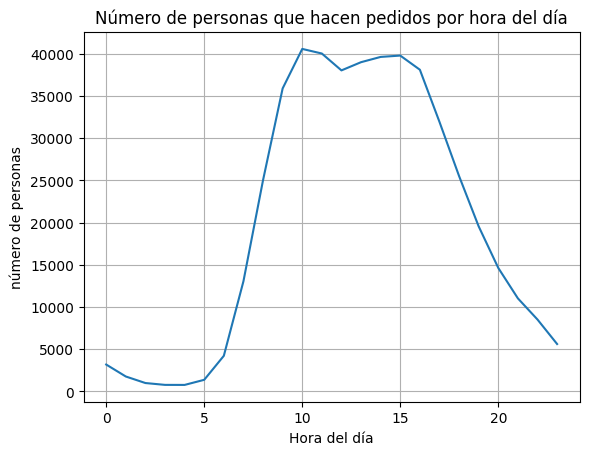

In [80]:
u_por_hora = df_orders.groupby('order_hour_of_day')['user_id'].count()

u_por_hora.plot(xlabel= 'Hora del día', ylabel= 'número de personas', title= 'Número de personas que hacen pedidos por hora del día', grid= True)
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

No deberías hacer una agrupación. Lo que deberías hacer aquí es aplicar `value_counts` sobre la columna `order_hourt_of_day` y un `sort_index` luego de eso. Eso lo graficas en barras ya que es lo más óptimo para comparar, los gráficos de líneas se usan más en comparaciones de datos temporales para identificar tendencas
</div>

<div class="alert alert-block alert-info">
    lo ejecuto:

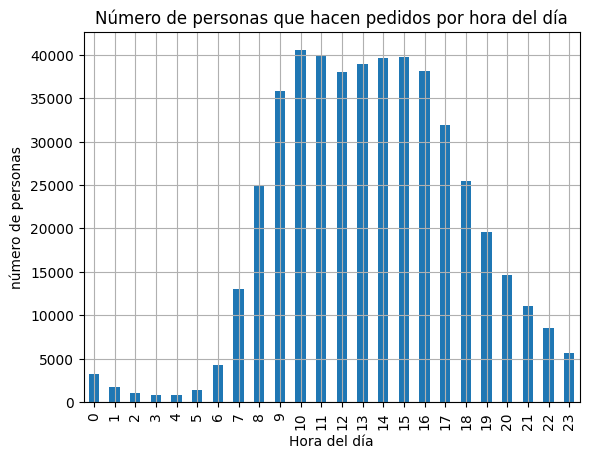

In [81]:
u_por_hora = df_orders['order_hour_of_day'].value_counts().sort_index()

u_por_hora.plot(kind= 'bar', xlabel= 'Hora del día', ylabel= 'número de personas', title= 'Número de personas que hacen pedidos por hora del día', grid= True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Ahora está mucho mejor, no olvides siempre redactar las conclusiones de cada gráfica mostrada
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

In [82]:
def dow(dia):
    if dia == 0:
        return 'domingo'
    elif dia == 1:
        return 'lunes'
    elif dia == 2:
        return 'martes'
    elif dia == 3:
        return 'miercoles'
    elif dia == 4:
        return 'jueves'
    elif dia == 5:
        return 'viernes'
    elif dia == 6:
        return 'sábado'

df_orders['dow'] = df_orders['order_dow'].apply(dow)



Realicé esta función para poder cambiar los valores númericos por strings e identificar con nombres los dias de la semana

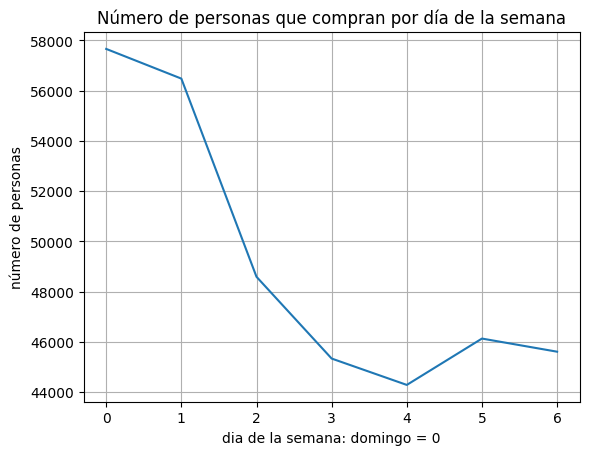

In [83]:
usuarios_order_dow = df_orders.groupby('order_dow')['user_id'].nunique()
usuarios_order_dow.plot(xlabel= 'dia de la semana: domingo = 0', ylabel= 'número de personas', title= 'Número de personas que compran por día de la semana', grid= True)

plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Igual que el caso anterior, al utilizar `.unique()` estás descartando que realicen más de una órden
</div>

<div class="alert alert-block alert-info">
    Trato de sacarlo de otra forma sin usar nunique()

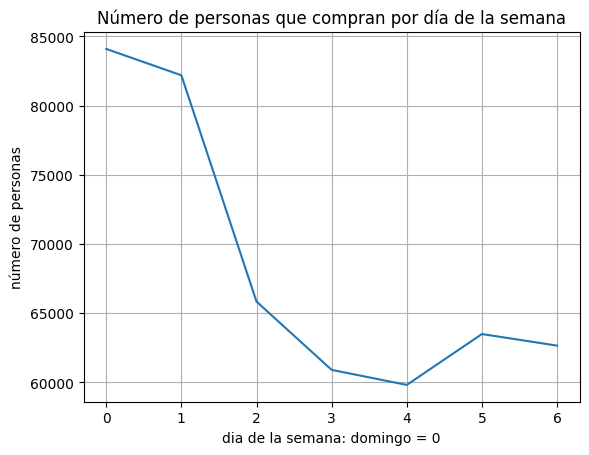

In [84]:
u_order_dow = df_orders.groupby('order_dow')['user_id'].count()
u_order_dow.plot(xlabel= 'dia de la semana: domingo = 0', ylabel= 'número de personas', title= 'Número de personas que compran por día de la semana', grid= True)

plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Similar al caso anterior, no deberías aplicar `groupby` sino un `value_counts` sobre `order_dow` ya que lo que interesa es ver la frecuencia de estos días, e igual esto debería mostrarse en una gráfica de barras
</div>

<div class="alert alert-block alert-info">
    lo ejecuto:

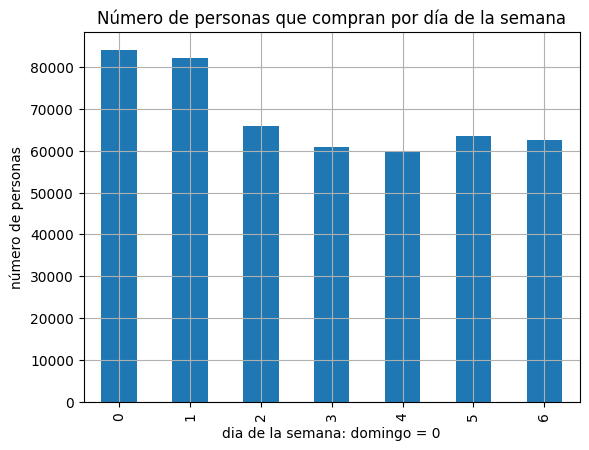

In [85]:
u_order_dow = df_orders['order_dow'].value_counts().sort_index()
u_order_dow.plot(kind= 'bar', xlabel= 'dia de la semana: domingo = 0', ylabel= 'número de personas', title= 'Número de personas que compran por día de la semana', grid= True)

plt.show()


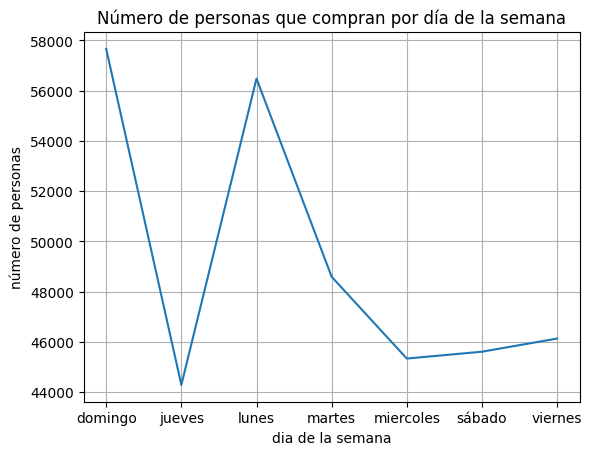

In [86]:
usuarios_dow = df_orders.groupby('dow')['user_id'].nunique()
usuarios_dow.plot(xlabel= 'dia de la semana', ylabel= 'número de personas', title= 'Número de personas que compran por día de la semana', grid= True)
plt.show()

Escribe aquí tus conclusiones

Trate de cambiar los valores numericos por los nombres de la semana, sin embargo, la gráfica acomodo los nombres alfabeticamente y no por orden, por eso deje las dos gráficas, pero el resultado es el mismo, vemos que el domingo y lunes es cuando la gente compra más y va disminuyendo conforme va avanzando la semana.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (3ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente! Ahora si se ve mucho mejor la gráfica y se puede comparar cada punto del eje X
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

0.0
30.0


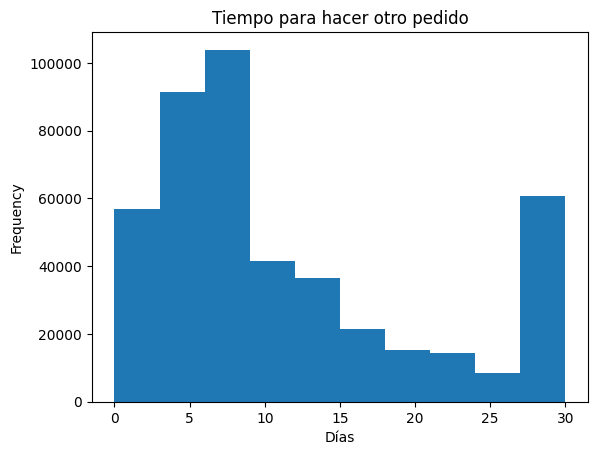

In [87]:
print(df_orders['days_since_prior_order'].min())
print(df_orders['days_since_prior_order'].max())


df_orders['days_since_prior_order'].plot(kind='hist', title= 'Tiempo para hacer otro pedido')
plt.xlabel('Días')
plt.show()

Escribe aquí tus conclusiones

Decidí mostrar un histograma porque solo es una variable que queremos ver, y saber cual es el tiempo que tarda la gente en hacer otro pedido, dónde podemos analizar que la media de las personas realiza un pedido antes de 9 días, dentro de un rango de 0 días a 30 días.  

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

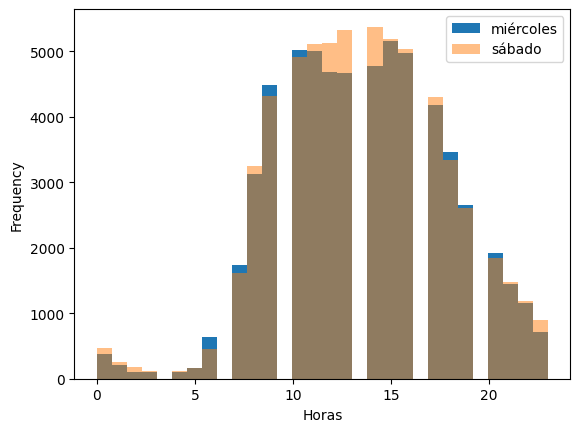

In [88]:
df_orders[df_orders['order_dow']==3]['order_hour_of_day'].plot(kind='hist', bins=30)
df_orders[df_orders['order_dow']==6]['order_hour_of_day'].plot(kind='hist', bins=30, alpha= 0.5)
plt.legend(['miércoles', 'sábado'])
plt.xlabel('Horas')
plt.show()

Escribe aquí tus conclusiones

La distribución de los días miercóles y sábado es muy similar, teniendo un poco más de pedidos los sábados

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cómo menciona el enunciado esto debería ser un gráfico de barras y no un histograma
</div>

<div class="alert alert-block alert-info">
En la descripción del proyecto que aparece del lado izquierdo para este punto dice lo siguiente: "Traza los histogramas de ambos días en el mismo gráfico y describe las diferencias que observes." ¿Entonces, a quien le hago caso? Aqui dice 'traza gráficos de barras' pero entonces tampoco especifica si los quieren en el mismo gráfico. Se vuelve un poco confuso si no se llegan a proporcionar instrucciones claras. A continuación grafico en barras en el mismo gráfico para comparar.

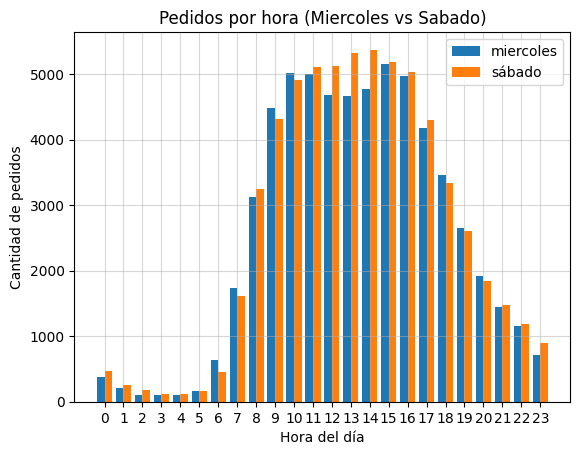

In [89]:
miercoles = df_orders[df_orders['order_dow']==3]
sabado = df_orders[df_orders['order_dow']==6]
horas_miercoles = miercoles['order_hour_of_day'].value_counts().sort_index()
horas_sabado = sabado['order_hour_of_day'].value_counts().sort_index()

horas = range(24)
valores_miercoles = [horas_miercoles.get(h, 0) for h in horas] 
valores_sabado = [horas_sabado.get(h, 0) for h in horas] 
import numpy as np
x = np.arange(len(horas))
ancho = 0.4
plt.bar(x - ancho/2, valores_miercoles, width=ancho, label= 'miercoles')
plt.bar(x + ancho/2, valores_sabado, width=ancho, label= 'sábado')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.title('Pedidos por hora (Miercoles vs Sabado)')
plt.xticks(x, horas)
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Los histogramas se utilizar más para analizar una distribución de una misma variable, sería aquí mejor un gráfico de barras ya que lo que queremos es comparar cada hora y no ver la distribución en sí de la variable, si ves la gráfica es mucho más sencillo comparar por cada hora que en un histograma
</div>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

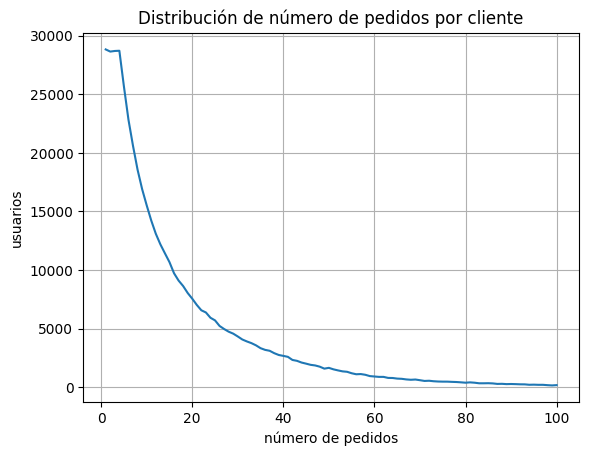

In [90]:
pedidos_por_usuario = df_orders.groupby('order_number')['user_id'].nunique()

pedidos_por_usuario.plot(xlabel= 'número de pedidos', ylabel= 'usuarios', title= 'Distribución de número de pedidos por cliente', grid=True)
plt.show()


Escribe aquí tus conclusiones

Con la gráfica podemos ver que son pocos los clientes que regresan a hacer más pedidos, parece ser que empiezan a hacer pedidos, pero conforme pasa el tiempo dejan de hacerlos y son muy pocos los clientes que son fieles.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [91]:
df_merged_products = df_ord_products.merge(df_products, on='product_id')

print(df_merged_products.head())

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    147172       11440                  7          1   
2   3341719       11440                  4          1   
3   1938779       11440                  8          1   
4   1728338       11440                 23          0   

                     product_name  aisle_id  department_id  
0  CHICKEN BREAST TENDERS BREADED       129              1  
1  CHICKEN BREAST TENDERS BREADED       129              1  
2  CHICKEN BREAST TENDERS BREADED       129              1  
3  CHICKEN BREAST TENDERS BREADED       129              1  
4  CHICKEN BREAST TENDERS BREADED       129              1  


In [92]:
top_products = df_merged_products.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
print(top_products.head(20))

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
dtype: int64


Escribe aquí tus conclusiones

Lo que hice fue unir dos dataframes el que contiene las ordenes con un número de identificación del producto y el dataframe que contiene el nombre de ese número que lo identifica, luego se filtro tanto por su número de identificación como por su nombre obteniendo un valor de cuantas veces aparece en cada combinación, así se pudieron obtener los 20 productos más pedidos. 

Podemos ver que el producto que más se pide es el plátano.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Cuando tengas este tipo de resultados siempre puedes complementarlos con gráficas para que el análisis sea más visual
</div>

<div class="alert alert-block alert-info">
Entiendo y es un buen consejo, y si no lo hice fue porque no se pedía. La grafico enseguida:

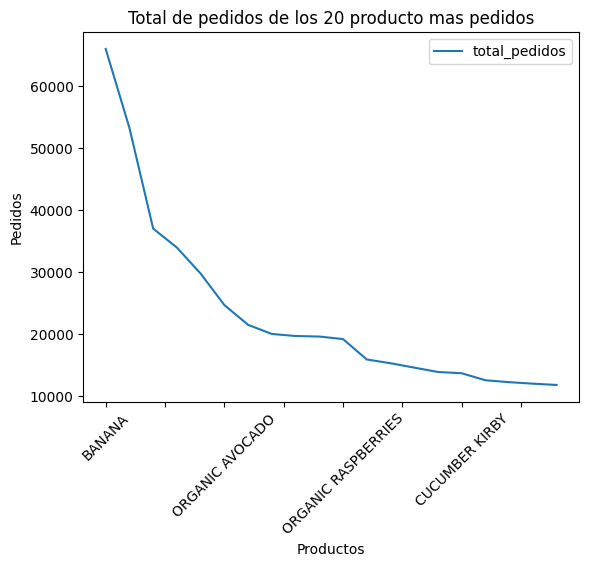

In [93]:
top_products_df = top_products.reset_index(name= 'total_pedidos')
top_p =(top_products_df.head(20))
top_p.plot(x='product_name', y= 'total_pedidos', xlabel= 'Productos', ylabel='Pedidos', rot= 45, title= 'Total de pedidos de los 20 producto mas pedidos')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Mismo consejo que los casos anteriores, cuando sea comparación entre cada punto lo mejor es mostrar gráficas de barras que líneas. Líneas es más para identificar tendencias
</div>

<div class="alert alert-block alert-info">
lo hago con barras:

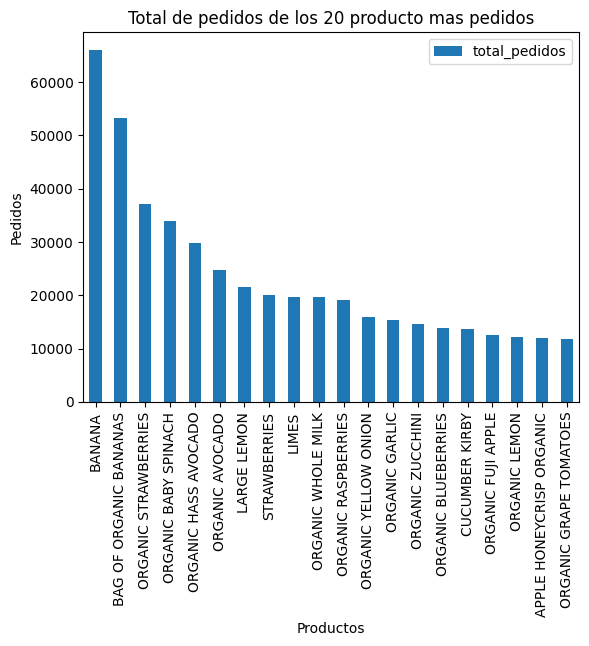

In [95]:
top_products_df = top_products.reset_index(name= 'total_pedidos')
top_p =(top_products_df.head(20))
top_p.plot(kind='bar', x='product_name', y= 'total_pedidos', xlabel= 'Productos', ylabel='Pedidos', title= 'Total de pedidos de los 20 producto mas pedidos')
plt.show()

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:

articulos_por_pedidos = df_merged_products.groupby('order_id')['product_id'].nunique()
print('El promedio de articulos vendidos por pedido:',articulos_por_pedidos.mean().astype('int'))

El promedio de articulos vendidos por pedido: 10


In [47]:
print(articulos_por_pedidos.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


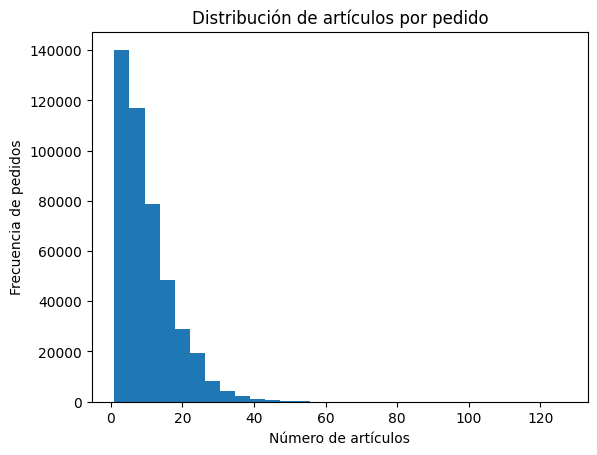

In [48]:
articulos_por_pedidos.plot(kind='hist', bins= 30, title='Distribución de artículos por pedido')
plt.xlabel('Número de artículos')
plt.ylabel('Frecuencia de pedidos')
plt.show()


Escribe aquí tus conclusiones

Observamos que el promedio de productos por pedido son 10 productos y al ver la distribución de los pedidos, podemos ver que la mayoría de las personas realizan pedidos de menos de 15 productos y son pocos los pedidos que tienen más de 20 productos o mas.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
products_reorder = df_merged_products[df_merged_products['reordered'] == 1]


In [50]:
top_products_reorder = products_reorder.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
print(top_products_reorder.head(20))



product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
dtype: int64


Escribe aquí tus conclusiones

Podemos ver que el producto que mas e vuelve a pedir es el plátano, y la lista se parece a la lista de los productos más comprados, pero si tiene sus diferencias.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
top_products_df = top_products.reset_index(name= 'total_pedidos')
print(top_products_df.head())
print()
top_products_reorder_df = top_products_reorder.reset_index(name= 'total_pedidos')
print(top_products_reorder_df.head())

   product_id            product_name  total_pedidos
0       24852                  BANANA          66050
1       13176  BAG OF ORGANIC BANANAS          53297
2       21137    ORGANIC STRAWBERRIES          37039
3       21903    ORGANIC BABY SPINACH          33971
4       47209    ORGANIC HASS AVOCADO          29773

   product_id            product_name  total_pedidos
0       24852                  BANANA          55763
1       13176  BAG OF ORGANIC BANANAS          44450
2       21137    ORGANIC STRAWBERRIES          28639
3       21903    ORGANIC BABY SPINACH          26233
4       47209    ORGANIC HASS AVOCADO          23629


In [52]:
top_products_df['porcentaje'] = (top_products_df['total_pedidos'] / top_products_df['total_pedidos'].sum())*100
print(top_products_df.head(10))


   product_id            product_name  total_pedidos  porcentaje
0       24852                  BANANA          66050    1.453243
1       13176  BAG OF ORGANIC BANANAS          53297    1.172649
2       21137    ORGANIC STRAWBERRIES          37039    0.814938
3       21903    ORGANIC BABY SPINACH          33971    0.747436
4       47209    ORGANIC HASS AVOCADO          29773    0.655070
5       47766         ORGANIC AVOCADO          24689    0.543211
6       47626             LARGE LEMON          21495    0.472937
7       16797            STRAWBERRIES          20018    0.440439
8       26209                   LIMES          19690    0.433223
9       27845      ORGANIC WHOLE MILK          19600    0.431242


In [53]:
top_products_reorder_df['porcentaje'] = (top_products_reorder_df['total_pedidos'] / top_products_reorder_df['total_pedidos'].sum())*100
print(top_products_reorder_df.head(10))


   product_id            product_name  total_pedidos  porcentaje
0       24852                  BANANA          55763    2.077733
1       13176  BAG OF ORGANIC BANANAS          44450    1.656210
2       21137    ORGANIC STRAWBERRIES          28639    1.067091
3       21903    ORGANIC BABY SPINACH          26233    0.977443
4       47209    ORGANIC HASS AVOCADO          23629    0.880418
5       47766         ORGANIC AVOCADO          18743    0.698366
6       27845      ORGANIC WHOLE MILK          16251    0.605513
7       47626             LARGE LEMON          15044    0.560541
8       27966     ORGANIC RASPBERRIES          14748    0.549512
9       16797            STRAWBERRIES          13945    0.519592


Escribe aquí tus conclusiones

Se crearon dos tablas, una para mostrar el porcentaje de las veces que se pide el producto y la segunda para mostrar el porcentaje de las veces que se vuelve a pedir

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
df_merged_orders = df_orders.merge(df_ord_products, on= 'order_id')
print(df_merged_orders.head())


   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1515936   183418            11          6                 13   
2   1515936   183418            11          6                 13   
3   1515936   183418            11          6                 13   
4   1515936   183418            11          6                 13   

   days_since_prior_order     dow  product_id  add_to_cart_order  reordered  
0                    30.0  sábado       19048                  1          1  
1                    30.0  sábado       47766                  3          1  
2                    30.0  sábado       45066                  9          0  
3                    30.0  sábado       24082                 11          0  
4                    30.0  sábado       24363                  4          0  


In [55]:
por_usuario = df_merged_orders.groupby('user_id')['reordered'].sum()
total_productos_usuario = df_merged_orders.groupby('user_id')['product_id'].count()
proporcion_productos = (por_usuario / total_productos_usuario)*100
porcentaje_productos = proporcion_productos.reset_index(name= 'porcentaje_productos')
print(porcentaje_productos)

        user_id  porcentaje_productos
0             2              3.846154
1             4              0.000000
2             5             66.666667
3             6              0.000000
4             7             92.857143
...         ...                   ...
149621   206203             22.222222
149622   206206             71.428571
149623   206207             89.130435
149624   206208             69.600000
149625   206209             32.000000

[149626 rows x 2 columns]


Escribe aquí tus conclusiones

Hemos obtenido por cada cliente el porcentaje de los productos que vuelve a ordenar. De esta manera podemos ver que tanto de su pedido es igual al anterior.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, buen trabajo con el cálculo de las proporciones
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [56]:
primeros_productos = df_merged_products[df_merged_products['add_to_cart_order'] == 1]
conteo_productos = primeros_productos[['product_id', 'product_name']].value_counts()
top_20 = conteo_productos.head(20).reset_index()
top_20.columns = ['product_id', 'product_name', 'count']

print(top_20)

    product_id                 product_name  count
0        24852                       BANANA  15562
1        13176       BAG OF ORGANIC BANANAS  11026
2        27845           ORGANIC WHOLE MILK   4363
3        21137         ORGANIC STRAWBERRIES   3946
4        47209         ORGANIC HASS AVOCADO   3390
5        21903         ORGANIC BABY SPINACH   3336
6        47766              ORGANIC AVOCADO   3044
7        19660                 SPRING WATER   2336
8        16797                 STRAWBERRIES   2308
9        27966          ORGANIC RASPBERRIES   2024
10       44632   SPARKLING WATER GRAPEFRUIT   1914
11       49235          ORGANIC HALF & HALF   1797
12       47626                  LARGE LEMON   1737
13         196                         SODA   1733
14       38689     ORGANIC REDUCED FAT MILK   1397
15       26209                        LIMES   1370
16       12341                HASS AVOCADOS   1340
17        5785  ORGANIC REDUCED FAT 2% MILK   1310
18       27086                 

Escribe aquí tus conclusiones

Al hacer un filtrado de sacar todos los productos que tengan el valor 1 en la columna 'add_to_cart_order' que es el primer artículo que se añadió al carrito, y haciendo un conteo de cuantas personas hicieron lo mismo, obtuvimos un listado de los 20 productos que la gente pone primero en sus pedidos. Siendo así que el producto estrella es el plátano, es el proiducto más pedido y podemos ver que es el primer producto que llegan a ordenar

### Conclusion general del proyecto:

La plataforma de Instacart generó varias bases de datos, de los cuales limpiamos, quitamos datos ausentes y duplicados, homologamos el nombre de los productos con mayúsculas, todo esto para que se pudieran trabajar con todos los datos.

Estos diferentes dataframes contienen diferente información, sin embargo, hay datos que llegan a coincidir entre ellos que nos ayudaron cuando teniamos que unir algunas de ellas, como el id del producto para saber que tipo de producto es.

Con todos estos datos, que son bastantes, se puede sacar muchisima información, y aunque este proyecto estuvo muy completo, aún se puede sacar más información de las órdenes, del comportamiento de los usuarios, de los productos, y ya se pueden tomar mejores decisiones sobre cambios que se quisieran hacer en la aplicación o que productos necesito tener más inventario.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Las conclusiones deberían ser un poco más detalladas, deberías resumir los hallazgos encontrados en las diferentes gráficas y cálculos realizados
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

De las diferentes preguntas que se pidió para este proyecto. Se encontraron varios hallazgos, inclusive antes de empezar a trabajar con los datos.

Lo primero que se realizó fue una limpieza de datos, este paso se realiza para poder trabajar con los datos, y que no nos vayan a marcar un error o algún resultado falso por no considerar una Mayúsula que puede cambiar el resultado o algún filtro.

Al tener 5 bases de datos, los pasos de limpieza se hicieron para cada uno de ellas. 
Primero se accedieron a las bases de datos, haciendo el primer hallazgo, que fue que el archivo cvs no estaba separado por ',' sino por ';'.
En segundo paso, a través del método info() analizamos las columnas, tipo de datos y cuantos valores completos tiene. Aqui ya puedes ver un poco más con que tipo de datos se va a trabajar en el análisis,
Posterior a este paso, se revisó la existencia de duplicados y que no fueran duplicados engañosos, y se decidió eliminar estos datos repetidos.

Siguiendo con la limpieza, detectamos de cada DataFrame los datos nulos de cada una de sus columnas, por lo que se dio a la tarea de analizar un poco más a que se debían estos valores, o que significaba, decidiendo así, por ejemplo en la base de datos que tenía valores nulos en producto coincidía que eran todos los productos del pasillo 21, por que se decidió reemplazar esos valores nulo por una plabara que dijera 'Unknown'. Otros que coincidian con el primer pedido del cliente, y otros porque eran los pedidos con mas de 64 productos. Sabiendo esta información sustituimos valores y como part de una homologación en la columna del nombre del producto, los cambiamos por mayúsculas y hasta revisamos que los datos utilizado fueran razonables, por ejemplo en la columna de 'order_hour_of_day' que solamente hubiera 24 valores y estos eran del 0 a 23.

Ahora si que ya tenemos todos los dataFrames limpios para poder trabajar, empezamos a obtener ahora si los hallazgos que nos solicitan.

Se empezó con una gráfica para enseñar el número de personas que hacen pedidos dependiendo la hora del día, sacando con esta visualización la conclusión de que la mayoría de los clientes hacen sus pedidos entre las 10 y las 15 horas, de la misma manera, se hizó otro gráfico que muestre ahora el día de la semana, sacabdo la conclusión de que el día que más se hacen pedidos son los días domingo.

Luego se pidió que se graficara el tiempo que espera para hacer el próximo pedido, viendo que la media lo hace en menos de 10 días y que el rango máximo es de 30 días.

Se hizo el hallazgo de que el comportamiento de los usuarios de los día sábado y miércoles es muy similar.

Posteriormente, se hizo el hallazgo de saber que son pocos los clientes que regresan a hacer más pedidos, parece ser que empiezan a hacer pedidos, pero conforme pasa el tiempo dejan de hacerlos y son muy pocos los clientes que son fieles.

También se obtuvo un listado de los 20 productos que más se piden y los que vuelven a pedir, siendo que el plátano es el producto estrella, de hecho, posteriormente también obtuvimos un listado de los productos que ponen primero en su carrito, y volvió a salir como número uno el plátano.

Trabajamos con los datos de cada dataFrame, y tuvimos que unir algunos para tener una relación y saber el product_id a que nombre_de_producto corresponde. Con los datos se trabajó para tener los porcentajes de los productos que se piden y vuelven a pedir.

Al final con todos estos datos, un ejecutivo de la empresa Instacart, ya puede tomar mejores decisiones, como el mantener un buen stock de plátano, y ver estrategias para que los usuarios sigan pidiendo y no abandonen la plataforma.

<div class="alert alert-block alert-success">
<b>Comentario general (3ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con los últimos cambios! Ahora el proyecto es mucho más completo y estás mostrando las gráficas adecuadas para el caso adecuado, siempre hay que identificar la gráfica correcta para que lo que estamos mostrando se pueda comprender con mejor claridad.

Procura llevarte las buenas prácticas de este notebook cómo el separar sección usando títulos markdown, tener un título general del proyecto, pero sobre todo el redactar tus interpretaciones después de cada gráfica o cálculo realizado para que el proceso de análisis sea más claro. Saludos!
</div>